<a href="https://colab.research.google.com/github/atmdatascience/python/blob/main/colab/Visualizaciones_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

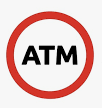

#Gráficos de la encuesta

## Modulos

In [1]:
import pandas as pd
import numpy as np

## Fuente de datos

In [2]:
url = "https://raw.githubusercontent.com/atmdatascience/python/main/datasets/encuestasweb/"

In [3]:
archivo2021 = "Encuestas-2021-Tramite-web.csv"

In [4]:
archivo2020 = "Encuestas-2020-Tramite-web.csv"

## Creación del dataframe

In [5]:
encuesta = pd.read_csv(url+archivo2021, sep=";")

## Visualización del dataframe

In [6]:
encuesta

,Marca temporal,1. Utiliza habitualmente la página web de ATM,2. Le resultó simple la creación de su cuenta en Mis Trámites,3. Le resulta comprensible la sección de Mis Trámites,4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:,5. La información brindada por la página web de ATM es:,6. El boleto para pagar el año 2021 lo obtiene por:,Agregue aquí su sugerencia
0,2/3/2021 9:49:57,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,"La unica sugerencia, es un poco mas de celerid..."
1,2/3/2021 9:54:50,SI,SI,SI,Muy satisfactoria,Buena,Descarga de la página web de ATM,NaN
2,2/3/2021 10:02:34,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN
3,2/3/2021 10:11:57,SI,NO,NO,Nada satisfactoria,Mala,Descarga de la página web de ATM,"Llevo 90 minutos al teléfono y nadie atiende, ..."
4,2/3/2021 10:32:09,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN
...,...,...,...,...,...,...,...,...
3126,7/8/2021 10:36:37,SI,SI,NO,Nada satisfactoria,Buena,Descarga de la página web de ATM,NaN
3127,7/8/2021 10:48:17,SI,SI,SI,Muy satisfactoria,Buena,no tengo,NaN
3128,7/8/2021 12:13:08,SI,SI,SI,Muy satisfactoria,Muy Buena,Recepción por correo electrónico,NaN
3129,7/8/2021 12:22:17,SI,SI,SI,Nada satisfactoria,Regular,Entrega en su domicilio real,Deberian realizar la atencion virtual de los c...


In [7]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3131 entries, 0 to 3130
Data columns (total 8 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Marca temporal                                                           3131 non-null   object
 1   1. Utiliza habitualmente la página web de ATM                            3131 non-null   object
 2   2. Le resultó simple la creación de su cuenta en Mis Trámites            3131 non-null   object
 3   3. Le resulta comprensible la sección de Mis Trámites                    3131 non-null   object
 4   4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:  3131 non-null   object
 5   5. La información brindada por la página web de ATM es:                  3121 non-null   object
 6   6. El boleto para pagar el año 2021 lo obtiene por:                      3131 non

## Limpieza y transformación de datos

In [8]:
encuesta.rename(columns={"Marca temporal":"Fecha"}, inplace=True) # "Marca temporal"
encuesta.rename(columns={"1. Utiliza habitualmente la página web de ATM":"P1"}, inplace=True) # "1. Utiliza habitualmente la página web de ATM"
encuesta.rename(columns={"2. Le resultó simple la creación de su cuenta en Mis Trámites":"P2"}, inplace=True) # "2. Le resultó simple la creación de su cuenta en Mis Trámites""
encuesta.rename(columns={"3. Le resulta comprensible la sección de Mis Trámites":"P3"}, inplace=True) # "3. Le resulta comprensible la sección de Mis Trámites"
encuesta.rename(columns={"4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:":"P4"}, inplace=True) # "4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:"
encuesta.rename(columns={"5. La información brindada por la página web de ATM es:":"P5"}, inplace=True) # "5. La información brindada por la página web de ATM es:"
encuesta.rename(columns={"6. El boleto para pagar el año 2021 lo obtiene por:":"P6"}, inplace=True) # "6. El boleto para pagar el año 2021 lo obtiene por:"
encuesta.rename(columns={"Agregue aquí su sugerencia":"P7"}, inplace=True) # "Agregue aquí su sugerencia"

In [9]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3131 entries, 0 to 3130
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   3131 non-null   object
 1   P1      3131 non-null   object
 2   P2      3131 non-null   object
 3   P3      3131 non-null   object
 4   P4      3131 non-null   object
 5   P5      3121 non-null   object
 6   P6      3131 non-null   object
 7   P7      1102 non-null   object
dtypes: object(8)
memory usage: 195.8+ KB


In [10]:
encuesta.drop(columns=["P7"], inplace=True)

In [11]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3131 entries, 0 to 3130
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   3131 non-null   object
 1   P1      3131 non-null   object
 2   P2      3131 non-null   object
 3   P3      3131 non-null   object
 4   P4      3131 non-null   object
 5   P5      3121 non-null   object
 6   P6      3131 non-null   object
dtypes: object(7)
memory usage: 171.4+ KB


In [12]:
encuesta["Fecha"] = pd.DatetimeIndex(encuesta["Fecha"])

In [13]:
encuesta.insert(1,column="Meses",value=pd.DatetimeIndex(encuesta["Fecha"]).month_name())
encuesta.insert(2,column="Dias",value=pd.DatetimeIndex(encuesta["Fecha"]).day_name())
encuesta.insert(3,column="Hora",value=pd.DatetimeIndex(encuesta["Fecha"]).hour)

In [14]:
encuesta.Meses = encuesta.Meses.astype(str).str.replace("February","Febrero")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("March","Marzo")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("April","Abril")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("May","Mayo")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("June","Junio")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("July","Julio")

In [15]:
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Monday","Lunes")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Tuesday","Martes")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Wednesday","Miercoles")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Thursday","Jueves")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Friday","Viernes")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Saturday","Sabado")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Sunday","Domingo")

In [16]:
encuesta["Encuestas"] = 1

In [17]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3131 entries, 0 to 3130
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      3131 non-null   datetime64[ns]
 1   Meses      3131 non-null   object        
 2   Dias       3131 non-null   object        
 3   Hora       3131 non-null   int64         
 4   P1         3131 non-null   object        
 5   P2         3131 non-null   object        
 6   P3         3131 non-null   object        
 7   P4         3131 non-null   object        
 8   P5         3121 non-null   object        
 9   P6         3131 non-null   object        
 10  Encuestas  3131 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 269.2+ KB


In [18]:
encuesta.head()

,Fecha,Meses,Dias,Hora,P1,P2,P3,P4,P5,P6,Encuestas
0,2021-02-03 09:49:57,Febrero,Miercoles,9,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,1
1,2021-02-03 09:54:50,Febrero,Miercoles,9,SI,SI,SI,Muy satisfactoria,Buena,Descarga de la página web de ATM,1
2,2021-02-03 10:02:34,Febrero,Miercoles,10,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,1
3,2021-02-03 10:11:57,Febrero,Miercoles,10,SI,NO,NO,Nada satisfactoria,Mala,Descarga de la página web de ATM,1
4,2021-02-03 10:32:09,Febrero,Miercoles,10,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,1


# Visualizaciones

In [19]:
import plotly.express as px
import plotly.graph_objects as go

## Graficos de Barra

### Grafico de Barras por Mes

#### Agrupacion de los datos

In [20]:
Meses = encuesta.groupby("Meses", as_index=False, sort=False).count()
Meses

,Meses,Fecha,Dias,Hora,P1,P2,P3,P4,P5,P6,Encuestas
0,Febrero,560,560,560,560,560,560,560,558,560,560
1,Marzo,750,750,750,750,750,750,750,746,750,750
2,Abril,677,677,677,677,677,677,677,676,677,677
3,Mayo,544,544,544,544,544,544,544,541,544,544
4,Junio,493,493,493,493,493,493,493,493,493,493
5,Julio,107,107,107,107,107,107,107,107,107,107


#### Grafico

In [21]:
fig = px.bar(Meses, 
             x="Meses", 
             y="Encuestas", 
             color="Meses", 
             title="Encuestas realizadas por mes")

fig.show()

In [22]:
fig = px.bar(Meses, x="Meses", y="Encuestas", title="Encuestas realizadas por mes")
fig.show()

### Grafico de Barras por Hora

#### Agrupacion de los datos

In [23]:
Horas = encuesta.groupby("Hora", as_index=False).count()
Horas

,Hora,Fecha,Meses,Dias,P1,P2,P3,P4,P5,P6,Encuestas
0,0,21,21,21,21,21,21,21,21,21,21
1,1,8,8,8,8,8,8,8,8,8,8
2,2,7,7,7,7,7,7,7,7,7,7
3,3,5,5,5,5,5,5,5,5,5,5
4,4,2,2,2,2,2,2,2,2,2,2
5,5,1,1,1,1,1,1,1,1,1,1
6,6,4,4,4,4,4,4,4,4,4,4
7,7,27,27,27,27,27,27,27,27,27,27
8,8,90,90,90,90,90,90,90,89,90,90
9,9,235,235,235,235,235,235,235,235,235,235


#### Grafico

In [24]:
fig = px.bar(Horas, x="Hora", y="Encuestas", title="Encuestas realizadas por hora en el día")
fig.update_xaxes(type="category")
fig.show()

### Grafico de Barras por Dia de la Semana

#### Agrupacion de los datos

In [25]:
Dias = encuesta.groupby("Dias", as_index=False, sort=False).count()
Dias

,Dias,Fecha,Meses,Hora,P1,P2,P3,P4,P5,P6,Encuestas
0,Miercoles,620,620,620,620,620,620,620,617,620,620
1,Jueves,617,617,617,617,617,617,617,615,617,617
2,Viernes,483,483,483,483,483,483,483,482,483,483
3,Sabado,94,94,94,94,94,94,94,94,94,94
4,Domingo,74,74,74,74,74,74,74,74,74,74
5,Lunes,611,611,611,611,611,611,611,609,611,611
6,Martes,632,632,632,632,632,632,632,630,632,632


#### Grafico

In [26]:
fig = px.bar(Dias, 
             x="Dias", 
             y="Encuestas", 
             title="Encuestas realizadas por día de la semana")

fig.update_xaxes(categoryorder="array", categoryarray= ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"])
fig.show()

### Grafico de Barras Pregunta 1 por Mes

¿Utiliza habitualmente la página web de ATM?

#### Agrupacion de los datos

In [27]:
MesesP1 = encuesta.groupby(["Meses","P1"], as_index=False, sort=False).count()
MesesP1

,Meses,P1,Fecha,Dias,Hora,P2,P3,P4,P5,P6,Encuestas
0,Febrero,SI,424,424,424,424,424,424,422,424,424
1,Febrero,NO,136,136,136,136,136,136,136,136,136
2,Marzo,SI,575,575,575,575,575,575,572,575,575
3,Marzo,NO,175,175,175,175,175,175,174,175,175
4,Abril,NO,135,135,135,135,135,135,135,135,135
5,Abril,SI,542,542,542,542,542,542,541,542,542
6,Mayo,SI,414,414,414,414,414,414,412,414,414
7,Mayo,NO,130,130,130,130,130,130,129,130,130
8,Junio,SI,364,364,364,364,364,364,364,364,364
9,Junio,NO,129,129,129,129,129,129,129,129,129


#### Grafico

In [28]:
fig = px.bar(MesesP1, x="Meses", y="Encuestas", color="P1", title="¿Utiliza habitualmente la página web de ATM?")
fig.show()

In [29]:
fig = px.bar(MesesP1, x="Meses", y="Encuestas", color="P1", title="¿Utiliza habitualmente la página web de ATM?", barmode="group")
fig.show()

### Grafico de Barras Pregunta 2 por Mes

¿Le resultó simple la creación de su cuenta en Mis Trámites?

#### Agrupacion de los datos

In [30]:
MesesP2 = encuesta.groupby(["Meses","P2"], as_index=False, sort=False).count()
MesesP2

,Meses,P2,Fecha,Dias,Hora,P1,P3,P4,P5,P6,Encuestas
0,Febrero,SI,483,483,483,483,483,483,481,483,483
1,Febrero,NO,77,77,77,77,77,77,77,77,77
2,Marzo,SI,642,642,642,642,642,642,639,642,642
3,Marzo,NO,108,108,108,108,108,108,107,108,108
4,Abril,SI,610,610,610,610,610,610,609,610,610
5,Abril,NO,67,67,67,67,67,67,67,67,67
6,Mayo,SI,481,481,481,481,481,481,478,481,481
7,Mayo,NO,63,63,63,63,63,63,63,63,63
8,Junio,SI,437,437,437,437,437,437,437,437,437
9,Junio,NO,56,56,56,56,56,56,56,56,56


#### Grafico

In [31]:
fig = px.bar(MesesP2, 
             x="Meses", 
             y="Encuestas", 
             color="P2", 
             title="¿Le resultó simple la creación de su cuenta en Mis Trámites?")
fig.show()

In [32]:
fig = px.bar(MesesP2, 
             x="Meses", 
             y="Encuestas", 
             color="P2", 
             title="¿Le resultó simple la creación de su cuenta en Mis Trámites?",
             barmode="group")
fig.show()

### Grafico de Barras Pregunta 3 por Mes

¿Le resulta comprensible la sección de Mis Trámites?

#### Agrupacion de los datos

In [33]:
MesesP3 = encuesta.groupby(["Meses","P3"], as_index=False, sort=False).count()
MesesP3

,Meses,P3,Fecha,Dias,Hora,P1,P2,P4,P5,P6,Encuestas
0,Febrero,SI,432,432,432,432,432,432,432,432,432
1,Febrero,NO,128,128,128,128,128,128,126,128,128
2,Marzo,SI,601,601,601,601,601,601,598,601,601
3,Marzo,NO,149,149,149,149,149,149,148,149,149
4,Abril,SI,561,561,561,561,561,561,560,561,561
5,Abril,NO,116,116,116,116,116,116,116,116,116
6,Mayo,SI,440,440,440,440,440,440,437,440,440
7,Mayo,NO,104,104,104,104,104,104,104,104,104
8,Junio,SI,411,411,411,411,411,411,411,411,411
9,Junio,NO,82,82,82,82,82,82,82,82,82


#### Grafico

In [34]:
fig = px.bar(MesesP3, 
             x="Meses", 
             y="Encuestas", 
             color="P3", 
             title="¿Le resulta comprensible la sección de Mis Trámites?")
fig.show()

In [35]:
fig = px.bar(MesesP3, 
             x="Meses", 
             y="Encuestas", 
             color="P3", 
             barmode="group",
             title="¿Le resulta comprensible la sección de Mis Trámites?")
fig.show()

### Grafico de Barras Pregunta 4 por Mes

El trámite que realizó dentro de Mis Trámites fue resuelto de forma...

#### Agrupacion de los datos

In [36]:
MesesP4 = encuesta.groupby(["Meses","P4"], as_index=False, sort=False).count()
MesesP4

,Meses,P4,Fecha,Dias,Hora,P1,P2,P3,P5,P6,Encuestas
0,Febrero,Muy satisfactoria,88,88,88,88,88,88,88,88,88
1,Febrero,Satisfactoria,319,319,319,319,319,319,318,319,319
2,Febrero,Nada satisfactoria,54,54,54,54,54,54,54,54,54
3,Febrero,Poco satisfactoria,99,99,99,99,99,99,98,99,99
4,Marzo,Satisfactoria,383,383,383,383,383,383,381,383,383
5,Marzo,Muy satisfactoria,142,142,142,142,142,142,141,142,142
6,Marzo,Nada satisfactoria,91,91,91,91,91,91,91,91,91
7,Marzo,Poco satisfactoria,134,134,134,134,134,134,133,134,134
8,Abril,Poco satisfactoria,108,108,108,108,108,108,108,108,108
9,Abril,Satisfactoria,316,316,316,316,316,316,316,316,316


#### Grafico

In [37]:
fig = px.bar(MesesP4, 
             x="Meses", 
             y="Encuestas", 
             color="P4", 
             title="El trámite que realizó dentro de Mis Trámites fue resuelto de forma...")
fig.show()

In [38]:
fig = px.bar(MesesP4, 
             x="Meses", 
             y="Encuestas", 
             color="P4", 
             barmode="group",
             title="El trámite que realizó dentro de Mis Trámites fue resuelto de forma...")
fig.show()

### Grafico de Barras Pregunta 5 por Mes

La información brindada por la página web de ATM es...

#### Agrupacion de los datos

In [39]:
MesesP5 = encuesta.groupby(["Meses","P5"], as_index=False, sort=False).count()
MesesP5

,Meses,P5,Fecha,Dias,Hora,P1,P2,P3,P4,P6,Encuestas
0,Febrero,Muy Buena,150,150,150,150,150,150,150,150,150
1,Febrero,Buena,293,293,293,293,293,293,293,293,293
2,Febrero,Mala,23,23,23,23,23,23,23,23,23
3,Febrero,Regular,92,92,92,92,92,92,92,92,92
4,Marzo,Muy Buena,229,229,229,229,229,229,229,229,229
5,Marzo,Regular,122,122,122,122,122,122,122,122,122
6,Marzo,Buena,363,363,363,363,363,363,363,363,363
7,Marzo,Mala,32,32,32,32,32,32,32,32,32
8,Abril,Buena,322,322,322,322,322,322,322,322,322
9,Abril,Regular,83,83,83,83,83,83,83,83,83


#### Grafico

In [40]:
fig = px.bar(MesesP5, 
             x="Meses", 
             y="Encuestas", 
             color="P5", 
             title="La información brindada por la página web de ATM es...")
fig.show()

In [41]:
fig = px.bar(MesesP5, 
             x="Meses", 
             y="Encuestas", 
             color="P5", 
             barmode="group",
             title="La información brindada por la página web de ATM es...")
fig.show()

## Grafico Circular

In [42]:
encuesta.head(2)

,Fecha,Meses,Dias,Hora,P1,P2,P3,P4,P5,P6,Encuestas
0,2021-02-03 09:49:57,Febrero,Miercoles,9,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,1
1,2021-02-03 09:54:50,Febrero,Miercoles,9,SI,SI,SI,Muy satisfactoria,Buena,Descarga de la página web de ATM,1


#### Grafico




In [43]:
fig = px.pie(encuesta, 
             values="Encuestas",
             names="Meses",
             title="Encuestas por Mes",
             hole=0.5)

fig.show()